In [3]:
%load_ext autoreload
%autoreload 2
from nlp_utils import *
from data_utils import *
from KeywordExtractor import *

methods = {1: "degree_centrality", 2: "closeness_centrality", 3: "betweenness_centrality", 4:"eigenvector_centrality", 5:"pagerank"} #, \
           #6:"katz_centrality"} #, 7: "hits"}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# WORD EMBEDDINGS
import gensim.downloader as api
import nltk
nltk.download('averaged_perceptron_tagger_eng')
# Download a pre-trained model
model_name = "glove-wiki-gigaword-50"

# Download and load the model
model = api.load(model_name)
model.save('data/model.model')

#import gensim.downloader as api

# Word2Vec GoogleNews 300d 
#model = api.load('word2vec-google-news-300')


#model.save('data/model.model')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Single abstract text example

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Given abstract: 
The island country of Japan has developed into a great economy after World War 2. The Japan sea is a source of fish. Sushi is a famous fish and rice food.

Extracted tokens: 
['island', 'country', 'japan', 'great', 'economy', 'world_war_2', 'japan', 'sea', 'source', 'fish', 'sushi', 'famous', 'fish', 'rice', 'food']

Extracted sentences: 
[['island', 'country', 'japan', 'great', 'economy', 'world_war_2'], ['japan', 'sea', 'source', 'fish'], ['sushi', 'famous', 'fish', 'rice', 'food']]

Co-occurrences: 
{('country', 'island'): 1, ('island', 'japan'): 1, ('country', 'japan'): 2, ('country', 'great'): 1, ('great', 'japan'): 2, ('economy', 'japan'): 1, ('economy', 'great'): 2, ('great', 'world_war_2'): 1, ('economy', 'world_war_2'): 1, ('japan', 'sea'): 1, ('japan', 'source'): 1, ('sea', 'source'): 2, ('fish', 'sea'): 1, ('fish', 'source'): 1, ('famous', 'sushi'): 1, ('fish', 'sushi'): 1, ('famous', 'fish'): 2, ('famous', 'rice'): 1, ('fish', 'rice'): 2, ('fish', 'food'): 

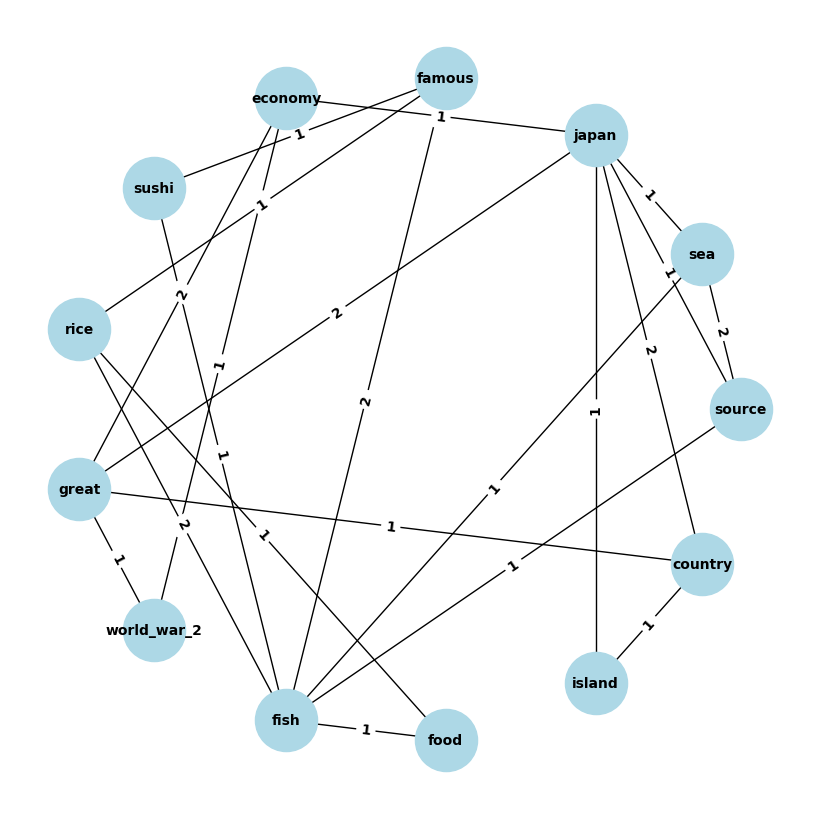

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
abstract = "The island country of Japan has developed into a great economy after World War 2. \
The Japan sea is a source of fish. Sushi is a famous fish and rice food."

ke = KeywordExtractor(abstract=abstract, window_size=3)
print(f"Given abstract: \n{abstract}\n")
print(f"Extracted tokens: \n{ke.tokens}\n")
print(f"Extracted sentences: \n{ke.sentences}\n")
print(f"Co-occurrences: \n{ke.co}\n")

keyword_dict = ke.order_nodes(method=methods[5], to_print=False) # done with method 5, pagerank
print(f"Keyword extraction scores: \n{keyword_dict}\n")
predicted_keywords = list(keyword_dict.keys())[:5]
print(f"The predicted keywords are: \n{predicted_keywords}")

ke.visualize_graph()

$5000$ paper abstracts scrape from IEEE example

Single Example

In [4]:
from KeywordExtractormo import KeywordExtractor
from data_utils import get_data


path_to_file = 'data/arxiv_data.csv' 
joined, abstracts, titles, keywords = get_data(path_to_file, version="inspec")

N = 15  # 示例索引
ke = KeywordExtractor(abstract=joined[N], window_size=3)
ke.add_we_weights()  

print(f"Given abstract: \n{joined[N]}\n")
print(f"Extracted tokens: \n{ke.tokens}\n")
print(f"Extracted sentences: \n{ke.sentences}\n")
print(f"Co-occurrences: \n{ke.co}\n")

keyword_dict = ke.order_nodes(method=methods[5], to_print=False)
print(f"Keyword extraction scores: \n{keyword_dict}\n")

predicted_keywords = list(keyword_dict.keys())[:7]
print(f"The gold keywords are: \n{keywords[N]}\n")
print(f"The predicted keywords are: \n{predicted_keywords}")


Given abstract: 
N/A. Descriptological foundations of programming Descriptological foundations of programming are constructed . An explication of the concept of a descriptive process is given . The operations of introduction and elimination of abstraction at the level of processes are refined . An intensional concept of a bipolar function is introduced . An explication of the concept of introduction and extraction of abstraction at the bipole level is given . On this basis , a complete set of descriptological operations is constructed

Extracted tokens: 
['foundation', 'foundation', 'explication', 'concept', 'descriptive', 'process', 'operation', 'introduction', 'elimination', 'abstraction', 'level', 'process', 'intensional', 'concept', 'bipolar', 'function', 'explication', 'concept', 'introduction', 'extraction', 'abstraction', 'bipole', 'level', 'basis', 'complete', 'set', 'operation']

Extracted sentences: 
[[], ['foundation', 'foundation'], ['explication', 'concept', 'descriptive',

[✓] Word embedding-based edge weights updated.


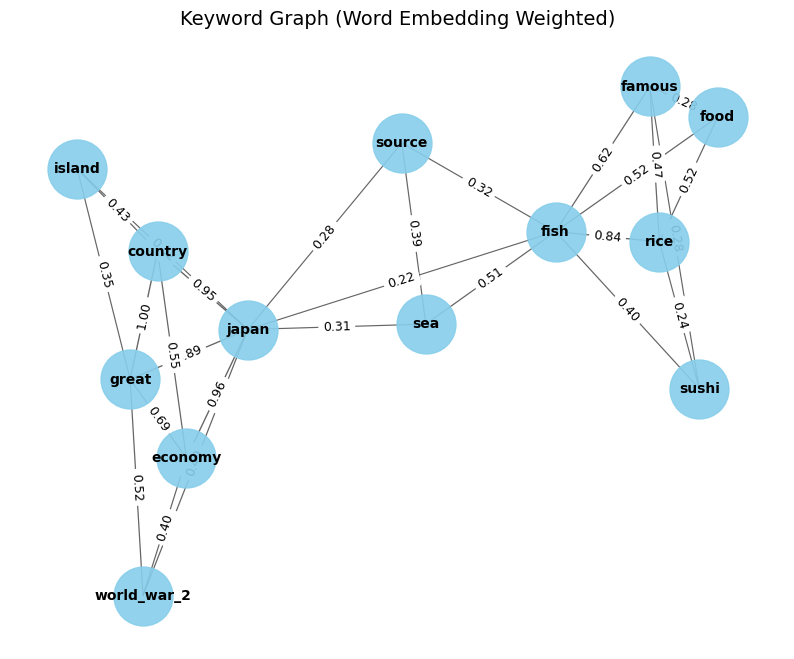

In [30]:
from KeywordExtractor import KeywordExtractor

if __name__ == "__main__":

    abstract=("The island country of Japan has developed into a great economy after World War 2. \
    The Japan sea is a source of fish. Sushi is a famous fish and rice food.")

    ke = KeywordExtractor(abstract=abstract, window_size=4)

    ke.add_we_weights(min_sim_threshold=0.01, normalize=True)

    ke.visualize_graph(title="Keyword Graph (Word Embedding Weighted)")


For multiple examples

In [10]:
path_to_file = 'data/arxiv_data.csv' 
metrics_dict = make_keyword_metrics(methods, path_to_file, window_size=3, number_of_papers=10, version="inspec")


[✓] Word embedding-based edge weights updated.
Finished 1. abstract
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
[✓] Word embedding-based edge weights updated.
